# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
# Your code here.
import pandas as pd

student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [6]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

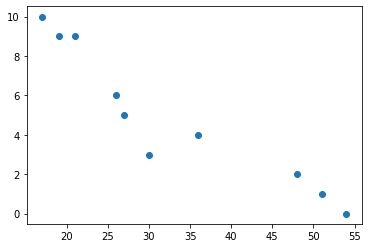

In [7]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(student_data['X'], student_data['Y'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Your response here. 
'''
There seems to be a correlation between age and tardiness. 

Hypothesis: Tardiness is negatively correlated to age - the older the subject, the lower the number of tardies.
'''

'\nThere seems to be a correlation between age and tardiness. \n\nHypothesis: Tardiness is negatively correlated to age - the older the subject, the lower the number of tardies.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
# Your response here.
from scipy import stats
import numpy as np

# https://realpython.com/numpy-scipy-pandas-correlation-python/#example-scipy-correlation-calculation

#correlation:

# using stats
# three methods of deriving the correlation
print(stats.pearsonr(student_data['X'], student_data['Y'])) # Pearson's r # only linear
print(stats.spearmanr(student_data['X'], student_data['Y'])) # Spearman's rho # may be multi-linear
print(stats.kendalltau(student_data['X'], student_data['Y'])) # Kendall Tau # may be multi-linear

# using Numpy
print(np.corrcoef(student_data['X'], student_data['Y'])) 
# corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients
# [[x,x x,y][y,x y,y]] 
# Pearson is default

# using Pandas
print(student_data['X'].corr(student_data['Y'])) # Pearson's r
print(student_data['X'].corr(student_data['Y'], method='spearman')) # Spearman's rho
print(student_data['X'].corr(student_data['Y'], method='kendall')) # Kendall Tau


#covariance:

# using Numpy
# https://numpy.org/doc/stable/reference/generated/numpy.cov.html
#https://www.geeksforgeeks.org/python-numpy-cov-function/
print(np.cov(student_data['X'], student_data['Y']))
#If COV(xi, xj) = 0 then variables are uncorrelated
#If COV(xi, xj) > 0 then variables positively correlated
#If COV(xi, xj) < 0 then variables negatively correlated
# returns COV[[x,x x,y][y,x y,y]]

# using pandas
# https://datatofish.com/covariance-matrix-python/
print(student_data.cov())


(-0.9391626886887121, 5.5666538345534396e-05)
SpearmanrResult(correlation=-0.9848069807617047, pvalue=2.2888344854823716e-07)
KendalltauResult(correlation=-0.9438798074485389, pvalue=0.00016213175204392636)
[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
-0.9391626886887122
-0.9848069807617047
-0.9438798074485389
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


In [10]:
# Difference between covariance and correlation

# Camparison between the values


# What they tell us in this case

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.

# https://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlation
# using stats

#Linear regression
result = stats.linregress(student_data['X'],student_data['Y'])
print(result)

# Slope: 
print(result.slope)

# Intercept:
print(result.intercept)

#R value:
print(result.rvalue)

#P value:
print(result.pvalue)

# Standard error:
print(result.stderr)


# outcome variable:

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)
-0.2428207709159808
12.888803363135768
-0.9391626886887121
5.56665383455343e-05
0.03139728816158607


Plot your regression model on your scatter plot.

In [ ]:
# Your code here.


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
# Import any libraries you may need & the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

vehicles = pd.read_csv('vehicles.csv')

In [14]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [15]:
vehicles.shape

(35952, 15)

In [18]:
vehicles.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [20]:
# Your response here. 

Y = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
X = ['CO2 Emission Grams/Mile']

print(vehicles[X].corr(vehicles[Y], method='spearman'))

TypeError: corr() got multiple values for argument 'method'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
